In [4]:
# unzipping dataset
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/MyDrive/FaceRecognition/archive2.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive2/UTKFace/30_1_0_20170117143902329.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._30_1_0_20170117143902329.jpg.chip.jpg  
  inflating: archive2/UTKFace/41_0_0_20170116214404363.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._41_0_0_20170116214404363.jpg.chip.jpg  
  inflating: archive2/UTKFace/58_0_1_20170113193258196.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._58_0_1_20170113193258196.jpg.chip.jpg  
  inflating: archive2/UTKFace/36_1_1_20170116155035948.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._36_1_1_20170116155035948.jpg.chip.jpg  
  inflating: archive2/UTKFace/25_0_0_20170113181532013.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._25_0_0_20170113181532013.jpg.chip.jpg  
  inflating: archive2/UTKFace/66_1_0_20170110123144558.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._66_1_0_20170110123144558.jpg.chip.jpg  
  inflating: archive2/UTKFace/40_0_1_201701

In [2]:
# import modules
import random
import keras
from tensorflow.keras import layers
from keras.models import Sequential
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_datasets as tfds

[900, 895, 589, 900, 900, 900, 900, 900, 900, 900, 900, 900, 699, 504, 137, 32]


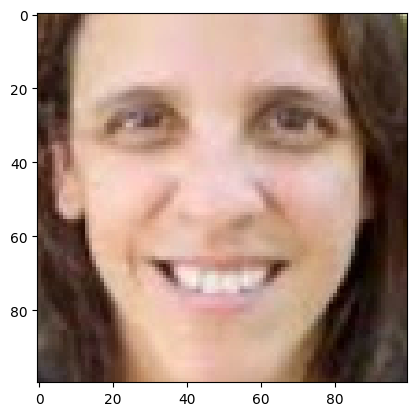

In [11]:
path = "/content/archive2/UTKFace/"

training = []
amounts = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for img in os.listdir(path):

    if img != ".DS_Store"and img != "20170116174525125.jpg.chip.jpg" and img != "20170109142408075.jpg.chip.jpg":
      classification = img.split("_")
      age = int(classification[0])

      if age < 5:
        category = 0

      elif age < 10 :
        category = 1

      elif age < 15 :
        category = 2

      elif age < 20  :
        category = 3

      elif age < 25 :
        category = 4

      elif age < 30 :
        category = 5

      elif age < 35:
        category = 6
       
      elif age < 40 :
        category = 7

      elif age < 45 :
        category = 8
    
      elif age < 50:
        category = 9

      elif age < 60 :
        category = 10
    
      elif age < 70 :
        category = 11

      elif age < 80 :
        category = 12
   
      elif age < 90 :
        category = 13
     
      elif age < 100:
        category = 14
      
      else:
        category = 15

      if amounts[category] < 900:
        amounts[category] +=1
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array,cv2.COLOR_RGB2BGR)
        imga = cv2.resize(img_array,dsize = (100,100), interpolation = cv2.INTER_CUBIC)
        training.append([imga, category])
# randomizes data
random.shuffle(training)
plt.imshow(training[0][0])
print(amounts)

In [13]:
X = []
y = []

for features, label in training:
    X.append(features)
    y.append(label)

Xarray = np.array(X).reshape(-1, 100, 100, 3)
Xarray.shape
Xarraydiv = Xarray/ 255

Xarraytype = Xarraydiv.astype('float32')
nexty = np_utils.to_categorical(y,16)
print(nexty.shape)

(11856, 16)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(Xarraytype,nexty,test_size = .2, random_state = 16)


In [15]:
input_shape = (100,100,3)
model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.RandomRotation(0.1),
        layers.RandomFlip("horizontal"),
        layers.Conv2D(128,kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2),
        layers.Conv2D(256,kernel_size=(3,3), activation = "relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(512,kernel_size = (3,3), activation = "relu"),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(150,activation="sigmoid"),
        layers.Dense(16, activation="sigmoid"),
    ]
)
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 random_rotation (RandomRota  (None, 23, 23, 64)       0

In [16]:
batch_size = 32
epochs = 20
model6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data =(X_test,y_test))

Epoch 1/20
297/297 [==============================] - 24s 26ms/step - loss: 2.6850 - accuracy: 0.0799 - val_loss: 2.6759 - val_accuracy: 0.0746
Epoch 2/20
297/297 [==============================] - 6s 20ms/step - loss: 2.6452 - accuracy: 0.1069 - val_loss: 2.5959 - val_accuracy: 0.1067
Epoch 3/20
297/297 [==============================] - 7s 23ms/step - loss: 2.4504 - accuracy: 0.1587 - val_loss: 2.3653 - val_accuracy: 0.1960
Epoch 4/20
297/297 [==============================] - 6s 20ms/step - loss: 2.2415 - accuracy: 0.2152 - val_loss: 2.2230 - val_accuracy: 0.2121
Epoch 5/20
297/297 [==============================] - 6s 21ms/step - loss: 2.1470 - accuracy: 0.2293 - val_loss: 2.0646 - val_accuracy: 0.2648
Epoch 6/20
297/297 [==============================] - 6s 20ms/step - loss: 2.0705 - accuracy: 0.2492 - val_loss: 1.9765 - val_accuracy: 0.2732
Epoch 7/20
297/297 [==============================] - 6s 21ms/step - loss: 2.0312 - accuracy: 0.2588 - val_loss: 1.9788 - val_accuracy: 0.269

In [18]:
path = "/content/gdrive/MyDrive/AgeRecognition"
model6.save(path)